# dependencies

In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 12.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 6.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [26]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 MB 4.5 MB/s eta 0:00:0000:0100:01


In [69]:
!pip install pydot

# imports

In [31]:
import pandas as pd
import numpy as np

In [1]:
import os

In [2]:
import tensorflow as tf # Import TensorFlow library
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import Keras image preprocessing library
from tensorflow.keras.layers import Dense, Dropout, Flatten # Import Keras layers for model architecture
from tensorflow.keras.models import Sequential # Import Keras sequential model
from tensorflow.keras.optimizers import Adam # Import Keras optimizer for training model


2023-05-01 21:25:36.479475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:

# These lines of code import the `pyplot` module from the `matplotlib` library and the `imread` function from the `matplotlib.image` module. 
# These will be used to display the images in the Jupyter notebook.
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [27]:
# Import cv2 library for image processing
import cv2

In [65]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model


# path to data

In [15]:
labels = os.listdir('/Users/brandonnavarrete/codeup-data-science/Image-Classification/natural_images')

In [16]:
labels.remove('.DS_Store')

In [17]:
print(labels)

['cat', 'car', 'fruit', 'dog', 'person', 'flower', 'motorbike', 'airplane']


# check images

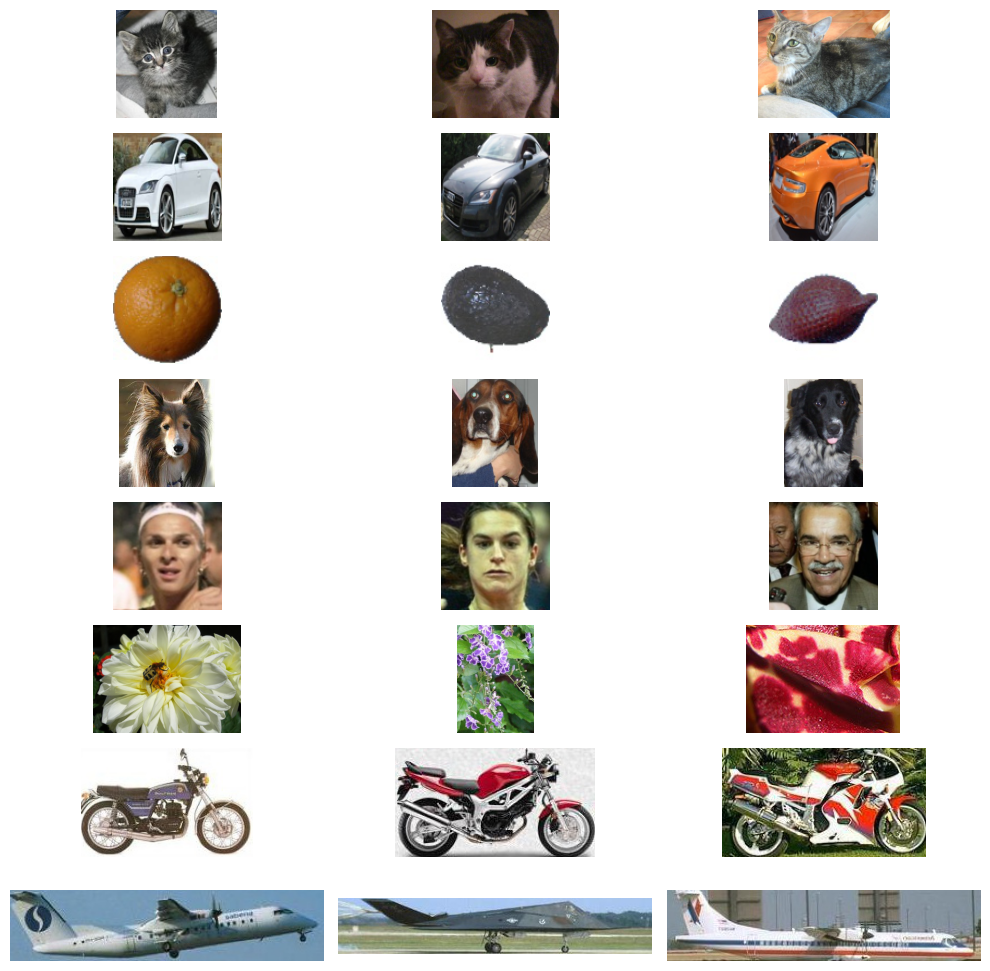

In [22]:
# where the images are stored
directory_path = '/Users/brandonnavarrete/codeup-data-science/Image-Classification/natural_images'

# os.listdir(directory_path) returns a list of all the files and directories in directory_path.
# if statement checks if each item in this list is a directory using the os.path.isdir() function.

folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

# create a plot

fig, axs = plt.subplots(nrows=len(folders), ncols=3, figsize=(10, 10))

# Loop over each folder in the list of folders
for i, folder in enumerate(folders):
    # Create a file path to the current folder
    folder_path = os.path.join(directory_path, folder)
    
    # Get a list of all the files in the current folder
    files = os.listdir(folder_path)
    
    # Set the y-label of the subplot in the ith row and first column to the name of the current folder
    axs[i, 0].set_ylabel(folder)
    
    # Loop over the first 3 files in the current folder
    for j in range(3):
        # Create a file path to the current file
        file_path = os.path.join(folder_path, files[j])
        
        # Read the image file into an array
        image = imread(file_path)
        
        # Display the image array in the subplot in the ith row and jth column
        axs[i, j].imshow(image)
        
        # Remove the axis labels and ticks from the subplot
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()


# normalize / standardized images

In [33]:
# Initialize empty lists to store image data and corresponding labels
x_data =[]
y_data = []

# Iterate over each label
for label in labels:
    # Set the path to the folder containing images for the current label
    path = '/Users/brandonnavarrete/codeup-data-science/Image-Classification/natural_images/{0}/'.format(label)
    
    # Get a list of all image filenames in the folder
    folder_data = os.listdir(path)
    
    # Iterate over each image in the folder
    for image_path in folder_data:
        # Load the image from the current path using cv2
        image = cv2.imread(path+image_path)
        
        # Resize the image to a fixed size of 120x120 pixels using cv2
        image_resized = cv2.resize(image, (120,120))
        
        # Append the resized image to the list of image data
        x_data.append(np.array(image_resized))
        
        # Append the label for the current image to the list of corresponding labels
        y_data.append(label)
        
    # End of inner for loop (image loop)
# End of outer for loop (label loop)

# Convert the lists of image data and labels to numpy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)

# Print the shape of the arrays containing image data and corresponding labels
print('X shape: ', x_data.shape, 'Y shape: ', y_data.shape)

# Normalize the pixel values in the image data to be between 0 and 1
x_data = x_data.astype('float32')/255


X shape:  (6899, 120, 120, 3) Y shape:  (6899,)


In [35]:
# image
x_data

array([[[[0.4392157 , 0.3019608 , 0.23921569],
         [0.47843137, 0.34509805, 0.28235295],
         [0.44313726, 0.32156864, 0.25882354],
         ...,
         [0.69411767, 0.6       , 0.5294118 ],
         [0.7058824 , 0.61960787, 0.5647059 ],
         [0.7372549 , 0.6509804 , 0.6       ]],

        [[0.40784314, 0.2784314 , 0.21568628],
         [0.42745098, 0.3019608 , 0.23921569],
         [0.45882353, 0.34117648, 0.27450982],
         ...,
         [0.6745098 , 0.57254905, 0.49411765],
         [0.69411767, 0.6117647 , 0.5411765 ],
         [0.72156864, 0.6431373 , 0.5764706 ]],

        [[0.4392157 , 0.3254902 , 0.25882354],
         [0.41960785, 0.30588236, 0.23921569],
         [0.3372549 , 0.22745098, 0.16470589],
         ...,
         [0.68235296, 0.57254905, 0.47843137],
         [0.6627451 , 0.5647059 , 0.47843137],
         [0.67058825, 0.5764706 , 0.49411765]],

        ...,

        [[0.83137256, 0.84705883, 0.8509804 ],
         [0.83137256, 0.84705883, 0.8509804 ]

In [34]:
# label
y_data


array(['cat', 'cat', 'cat', ..., 'airplane', 'airplane', 'airplane'],
      dtype='<U9')

# encoding y 

In [42]:
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

# randomize data

In [92]:
ran = np.arange(x_data.shape[0])
# new seed
np.random.seed(42)
np.random.shuffle(ran)
X = x_data[ran]
Y = y_categorical[ran]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [94]:
len(X_test)

1380

In [95]:
len(Y_test)

1380

# create CNN model

In [54]:
# Create a Sequential model object
model = models.Sequential()

# Add a 2D convolutional layer with 32 filters and a 5x5 kernel size, using ReLU activation function and the input shape of X_train
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

# Add a 2D max pooling layer with a 2x2 pool size
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters and a 3x3 kernel size, using ReLU activation function
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add another 2D max pooling layer with a 2x2 pool size
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Add a Dropout layer with a rate of 0.25 to help prevent overfitting
model.add(layers.Dropout(rate=0.25))

# Flatten the output of the previous layer into a 1D array
model.add(layers.Flatten())

# Add a Dense layer with 256 neurons and a ReLU activation function
model.add(layers.Dense(256, activation='relu'))

# Add another Dropout layer with a rate of 0.5 to further prevent overfitting
model.add(layers.Dropout(rate=0.5))

# Add a final Dense layer with 8 neurons and a softmax activation function, representing the 8 output classes
model.add(layers.Dense(8, activation='softmax'))

# complile

In [56]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [61]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# train

In [62]:
t_model = model.fit(X_train, Y_train, epochs=5, validation_split=0.2)


Epoch 1/5
138/138 [==============================] - 75s 529ms/step - loss: 0.0655 - accuracy: 0.9826 - val_loss: 0.3741 - val_accuracy: 0.8940
Epoch 2/5
138/138 [==============================] - 78s 561ms/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.3904 - val_accuracy: 0.8895
Epoch 3/5
138/138 [==============================] - 79s 571ms/step - loss: 0.0302 - accuracy: 0.9887 - val_loss: 0.4073 - val_accuracy: 0.8949
Epoch 4/5
138/138 [==============================] - 79s 573ms/step - loss: 0.0423 - accuracy: 0.9860 - val_loss: 0.3799 - val_accuracy: 0.9058
Epoch 5/5
138/138 [==============================] - 77s 558ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.6498 - val_accuracy: 0.8560


# look at model

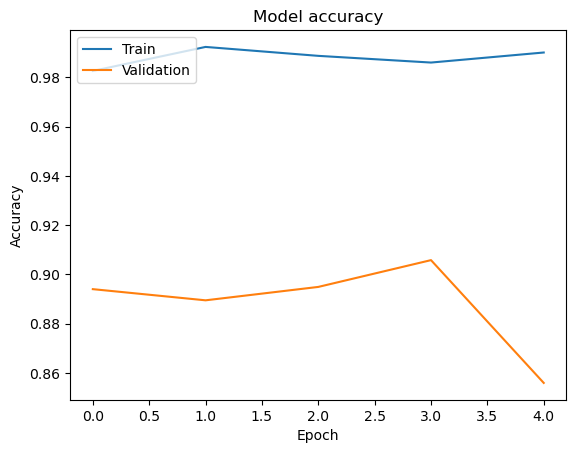

In [71]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(t_model.history['accuracy'])
plt.plot(t_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


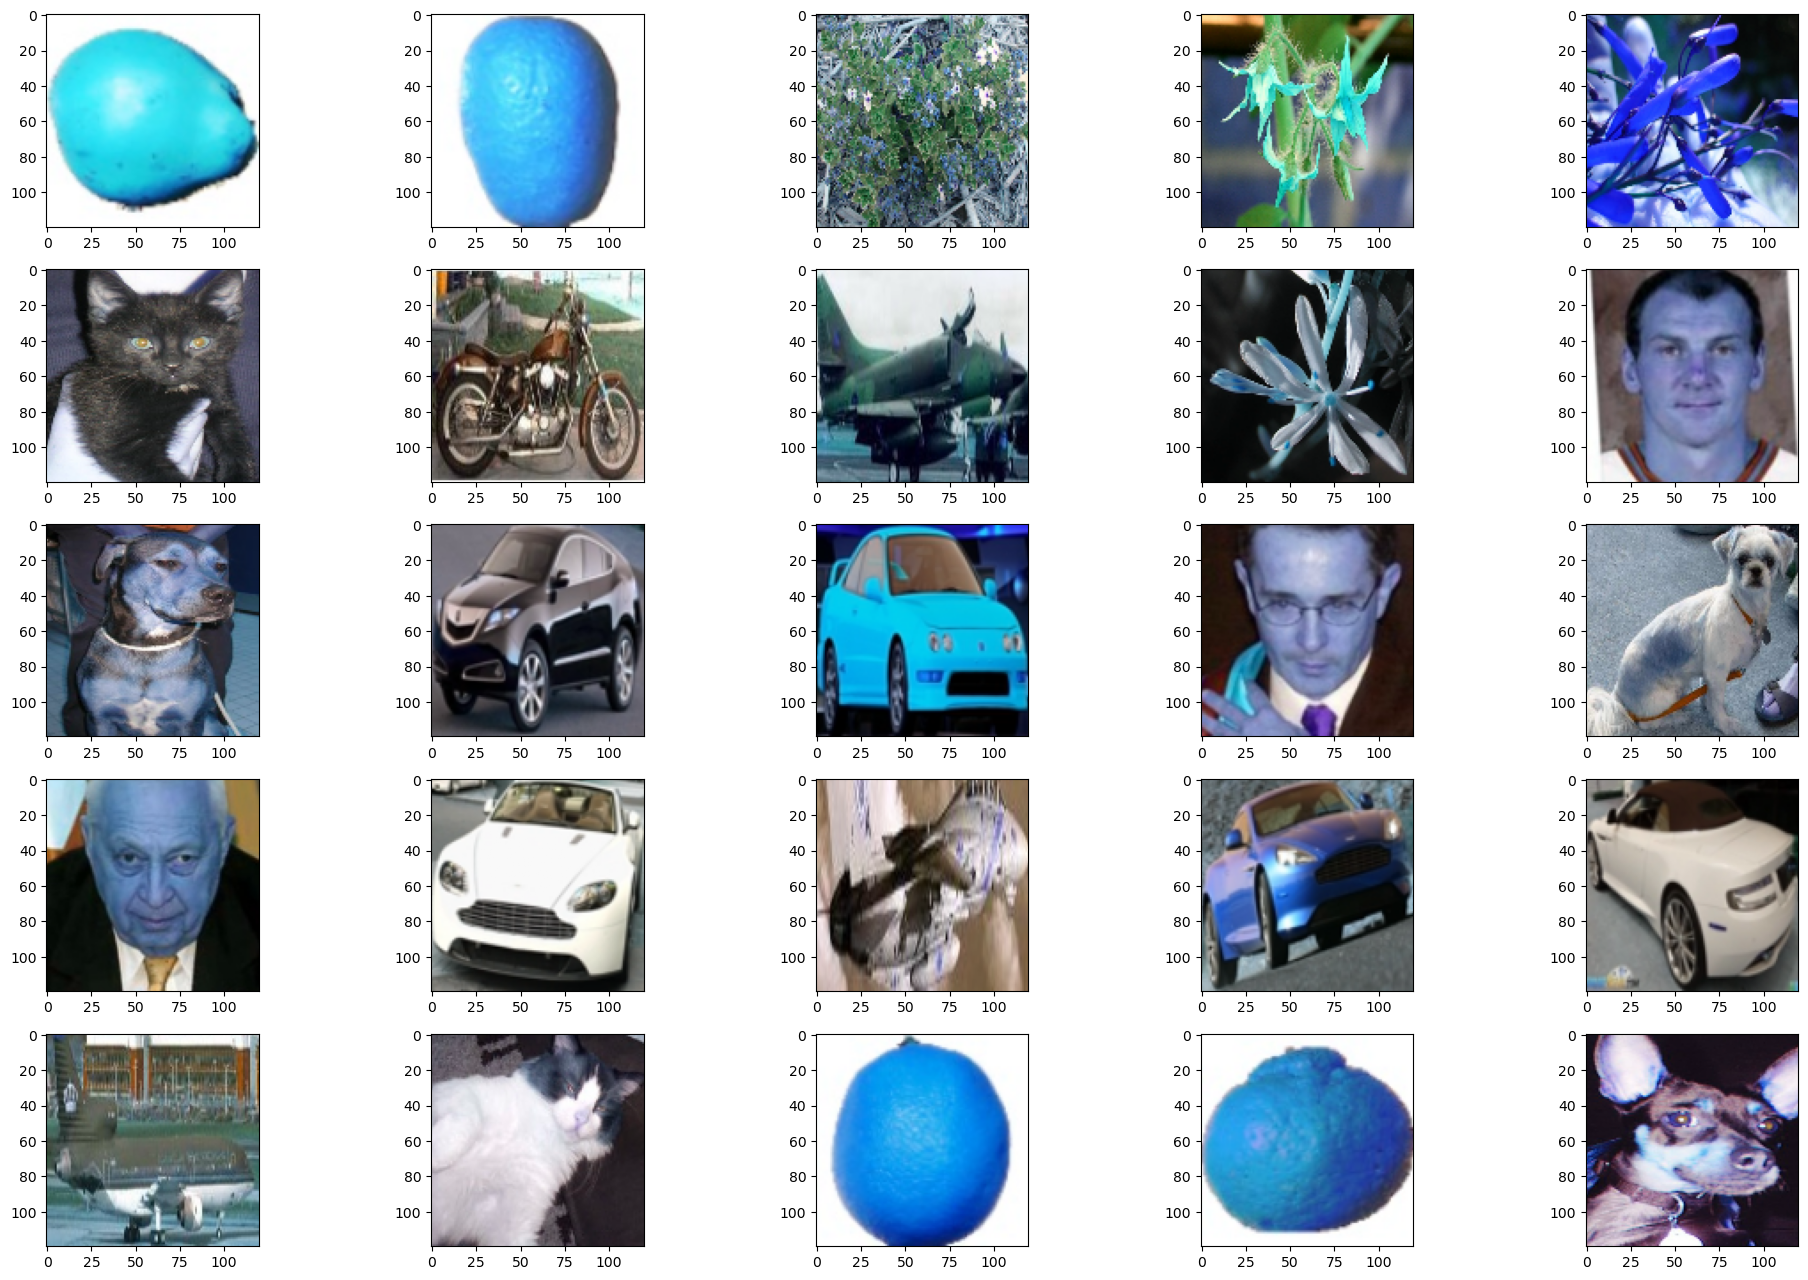

In [72]:
fig = plt.figure(figsize=(24, 16))

for s in range(len(X_test[:25])):
    numberplt = s+1
    fig.add_subplot(5, 5, numberplt)
    plt.imshow(X_test[s])
    pass

# metrics

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [81]:
Y_pred = np.argmax(model.predict(X_test), axis=1)

44/44 [==============================] - 5s 107ms/step


In [83]:
len(Y_pred)

1380

In [96]:
Y_test


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [97]:
accuracy = accuracy_score(np.argmax(Y_test, axis=1), Y_pred)


In [98]:
print("Accuracy: ", accuracy)

Accuracy:  0.8804347826086957


In [102]:

# Define image parameters
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 10

# Define data generators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define model architecture
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# Train model
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluate model on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
loss, accuracy = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

NameError: name 'train_data_dir' is not defined